# Gradient Descent

In this notebook, I will implement for LR:
1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. Mini Batch Gradient Descent

### Preparing Dummy data for Regression with GD

**Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.random.seed(1)

**Random Noise Function**

In [2]:
def noise(arr):
    arr = arr + np.random.randn(arr.shape[0]) * 15
    return arr

**Normalizing Function**

In [3]:
def normalize(data):
    for i in range(0, data.shape[1]):
        data[:, i] = (data[:, i] - np.mean(data[:, i])) / np.std(data[:,i])

**Data Plotter Function**

In [4]:
def plot_data(data, title):
    
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.scatter(data[:, 0], data[:, -1], c = 'mediumseagreen', alpha = 0.5)
    plt.title(title)
    
    plt.show()

In [5]:
def cost_plot(cost, iterations, title):
    
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.plot(iterations, cost)
    plt.title(title)
    
    plt.show()

In [6]:
def weight_plot(w, it, title):
    
    t = []
    b = []
    
    for i in w:
    
        t.append(i[1])
        b.append(i[0])
    
    plt.xlabel('Iterations')
    plt.ylabel('Weights')
    plt.plot(it, t, color = 'blue', label = 'Weight')
    plt.plot(it, b, color = 'red', label = 'Bias')
    plt.legend()
    plt.title(title)
    plt.show()

**Creating Dataset and Preprocessing**

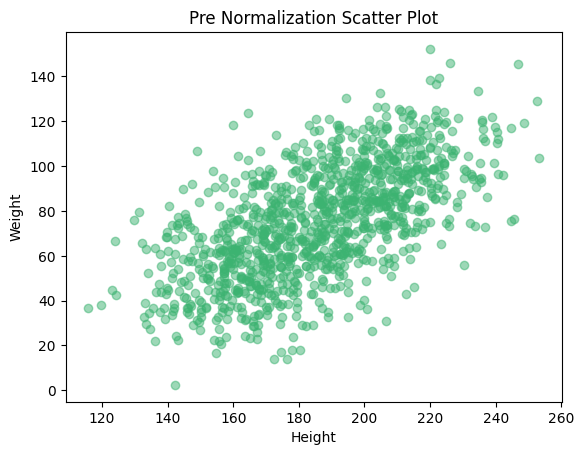

In [7]:
height = noise(np.arange(150, 220, 0.0625))
weight = noise(np.arange(40, 110, 0.0625))

data = np.column_stack((height, weight))
np.random.shuffle(data)
plot_data(data, 'Pre Normalization Scatter Plot')

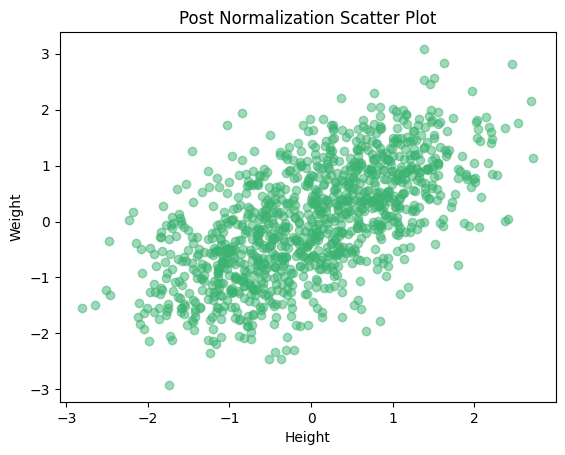

In [8]:
normalize(data)
plot_data(data, 'Post Normalization Scatter Plot')

In [9]:
X = data[:, 0].reshape((1120, 1))
y = data[:, -1].reshape((1120, 1))

b = np.ones((X.shape[0], 1), dtype = 'float')
X = np.column_stack((b, X))

print(f'X shape: {X.shape}\t', f'y shape: {y.shape}')

X shape: (1120, 2)	 y shape: (1120, 1)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Hypothesis Function**

In [11]:
def h(X, theta):
    return np.dot(X, theta)

**Cost Function**

In [12]:
def J(X, theta, y):
    if X.shape == ():
        m = 1
    else:
        m = X.shape[0]
        
    return (1/m) * (np.dot((h(X, theta) - y).T, h(X, theta) - y))

In [13]:
def J_reg(X, theta, y, regu, lambda_):
    if X.shape == ():
        m = 1
    else:
        m = X.shape[0]
        
    return (1/m) * (np.dot((h(X, theta) - y).T, h(X, theta) - y) + lambda_ * regularization(theta, regu))

In [14]:
def regularization(theta, regu):
    if regu == 'lasso':
        return np.dot(theta.T, theta)
    
    elif regu == 'ridge':
        return np.dot(np.abs(theta).T, np.ones((theta.shape), dtype = 'float'))
    

### Batch Gradient Descent

* Batch Gradient Descent or Gradient descent is the base version of the algorithm. 
* GD is a first order iterative optimisation algorithm which is used to find the max/min of a function
* Requirements for GD:
    1. Function being optimized should be differentiable
    2. function should be convex


* **1 epoch** ==>
    1. Select a sample
    2. Feed to NN
    3. Calculate Gradient
    4. Repeat 1-3 for all samples and find mean of Gradients
    5. Update params for the mean of gradients


In [15]:
def batch_gradient_descent(X, y, theta, lr, epochs, title, regu, lambda_):
    
    cost = []
    it = []
    i = 1
    thetas = []
    
    m = X.shape[0]
    
    for i in range(1, epochs + 1):
        cost.append(J_reg(X, theta, y, regu,lambda_)[0])
        it.append(i)
        
        dt = (1/m) * (np.dot(X.T, h(X, theta) - y) + lambda_ * np.dot(theta.T, theta))
        theta = theta - lr * dt
        thetas.append(theta)
       
    print('Final Cost:', cost[-1])
    weight_plot(thetas, it, title)
    cost_plot(cost, it, title)
    print('Final Weights: ', theta)
    return theta

Final Cost: [0.60393603]


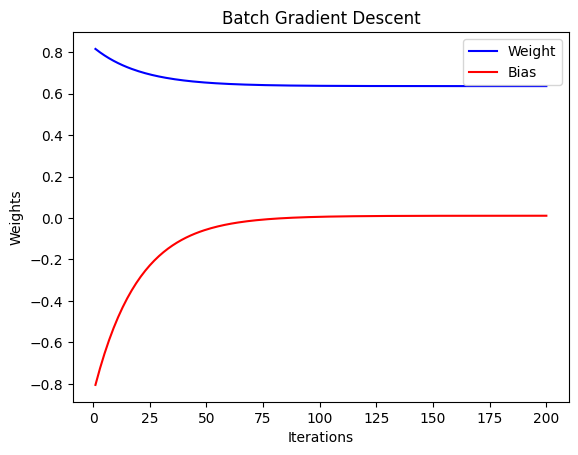

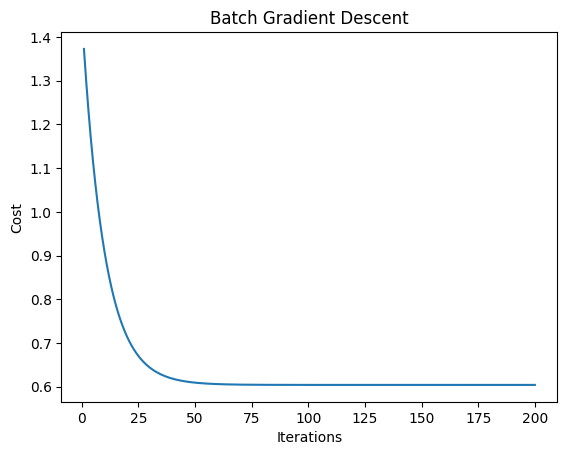

Final Weights:  [[0.0108098 ]
 [0.63603421]]


In [16]:
theta = np.random.randn(2,1)
theta = batch_gradient_descent(X_train, y_train, theta, 0.05, 200, title = 'Batch Gradient Descent', regu = 'lasso', lambda_ = 0.01)

**Predicted Linear Function**

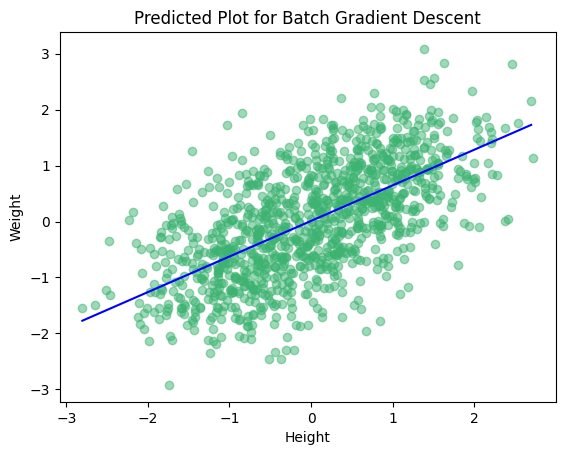

Train MSE: 0.6039308663918161


In [27]:
x = np.linspace(np.min(X_train),np.max(X_train), X_train.shape[0]).reshape(X_train.shape[0],1)
yline = h(x, theta[1].reshape(1,1)) + theta[0].reshape(1,1)
plt.plot(x, yline, c = 'blue')

plot_data(data, 'Predicted Plot for Batch Gradient Descent')

### Stochastic Gradient Descent

* Stochastic Gradient Descent is a variation of the Gradient Descent used for large datasets. It's faster than BGD
* **SGD works by:**

    1) Select a training sample
    2) Feed to the NN
    3) Calculate the gradient
    4) Update the parameters
    5) Repeat 1-4 for all training samples


* SGD **cannot** be used with Vectorisation and must be implemented using loops
* SGD will never reach the minima but it will oscillate about the minima

In [15]:
import random
def stochastic_gradient_descent(X, y, theta, b, lr, iterations):
    
    m = 1
    cost = []
    thetas = []
    it = []
    epochs = 0
    title = 'Stochastic Gradient Descent'
    
    for e in range(iterations):
        
        for i in range(0, X.shape[0]):

            dt = 2*X[i] * (h(X[i], theta) - y[i])

            theta = theta - lr * dt.reshape(2, 1)
            epochs += 1
            
            thetas.append(theta)
            cost.append(J(X, theta, y)[0])
            it.append(epochs)
            
    weight_plot(thetas, it, title)
    cost_plot(cost, it, title)

    return theta

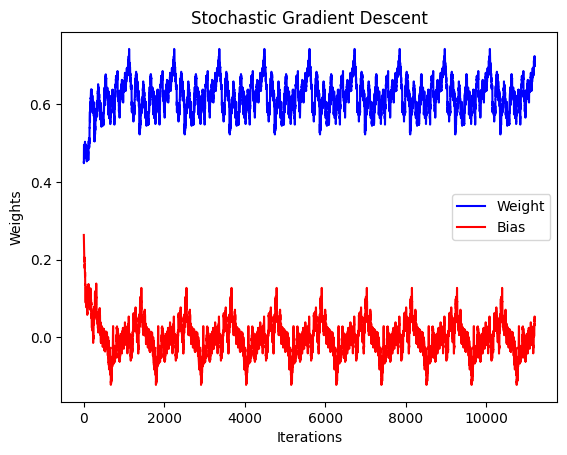

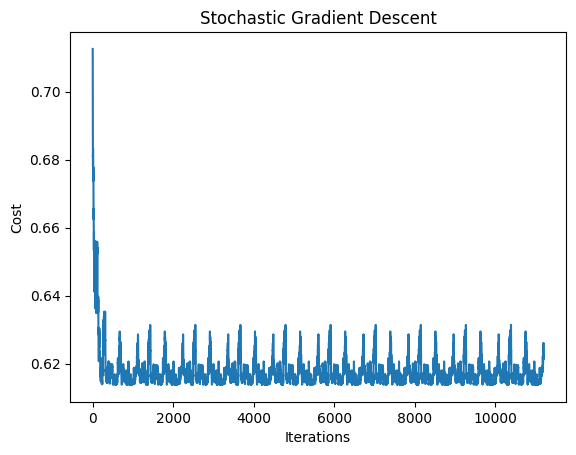

In [16]:
theta = np.random.randn(2,1)
theta = stochastic_gradient_descent(X, y, theta, b, 0.005, 10)

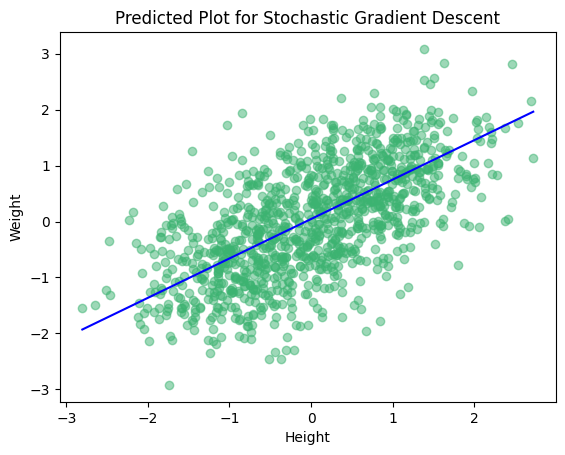

In [17]:
x = np.linspace(np.min(X),np.max(X), X.shape[0]).reshape(X.shape[0],1)
yline = h(x, theta[1]) + theta[0]
plt.plot(x, yline, c = 'blue')
plot_data(data, 'Predicted Plot for Stochastic Gradient Descent')

### Mini Batch Gradient Descent

* Mini Batch Gradient Descent is a combination of Batch and Stochastic Gradient Descent.
* It uses the strong points of both BGD and SGD in order to perform the best for large datasets
* It uses Vectorization from BGD and intermediate parameter updates to speed things along
* **1 epoch:**
    1) Selecting a batch of 'batch size' from the training samples
    2) Feeding to NN
    3) Calculating the gradient
    4) Update params based on batch gradient
    5) Repeat 1-4 for all batches

In [18]:
def mb_gradient_descent(X, y, theta, lr, iterations, batch_size):

    no_of_batches = X.shape[0]//batch_size
    thetas = np.empty((2,no_of_batches), dtype = 'float')
    title = 'Mini Batch Gradient Descent'

    for _ in range(1, no_of_batches+1):

        ran = np.random.choice(X.shape[0], batch_size, replace = True)
        x_batch = X[ran, :]
        y_batch = y[ran, :]
        theta = batch_gradient_descent(x_batch, y_batch, theta, lr, iterations, title)
        
        return theta

Final Cost: [0.28281188]


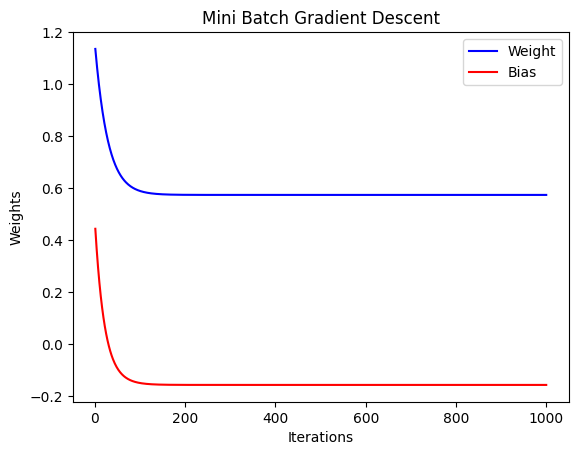

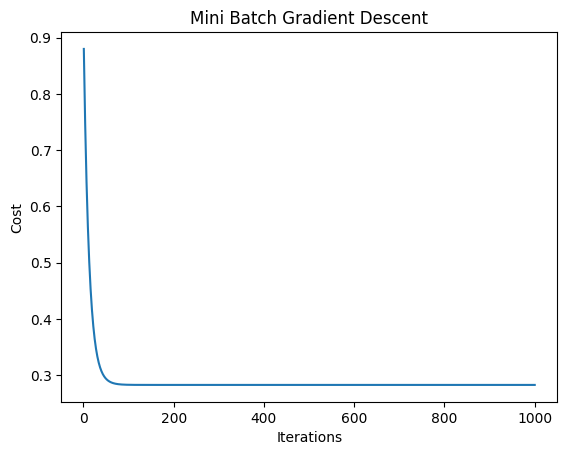

Final Weights:  [[-0.15711324]
 [ 0.57415208]]


In [19]:
theta = np.random.randn(2,1)
theta = mb_gradient_descent(X, y, theta, 0.05, 1000, 32)

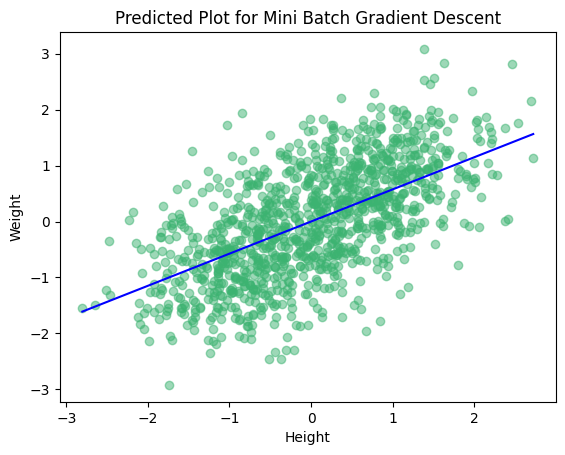

In [20]:
x = np.linspace(np.min(X),np.max(X), X.shape[0]).reshape(X.shape[0],1)
yline = h(x, theta[1])
plt.plot(x, yline, c = 'blue')
plot_data(data, 'Predicted Plot for Mini Batch Gradient Descent')

### Implementing Batch Gradient Descent with Momentum

Momentum is a variation/extension of Gradient Descent which basically allows the algorithm to built inertia in order to overcome noise and possible saddle points in the Error Space

In [21]:
def batch_gradient_descent_momentum(X, y, theta, lr, epochs, momentum):
    
    cost = []
    it = []
    i = 1
    dt_m = []
    m = X.shape[0]
    
    for i in range(1, epochs + 1):
        cost.append(J(X, theta, y)[0])
        it.append(i)
        
        dt = (1/m) * np.dot(X.T, h(X, theta) - y)
        dt_m.append(dt[1])
        
        if all(x <= 0 for x in dt_m):
            lr += momentum
        else:
            dt_m = []
        
        theta = theta - lr * dt

    print(cost[-1])
    cost_plot(cost, it, 'BGD with Momentum of 0.05')
    
    return theta

[0.61375245]


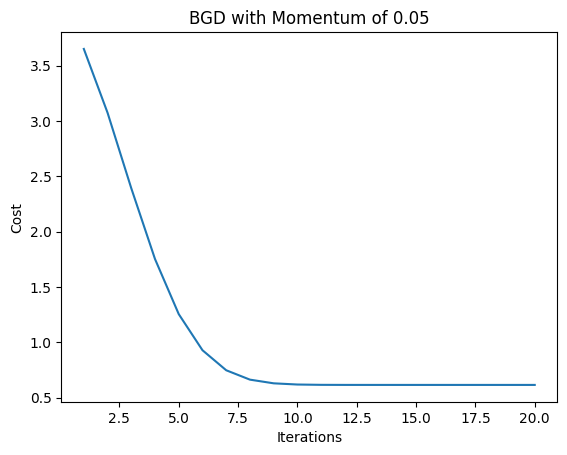

In [22]:
theta = np.random.randn(2,1)
theta = batch_gradient_descent_momentum(X, y, theta, lr = 0.05, epochs = 20, momentum = 0.05)

### Gradient Descent for Multivariate Linear Regression

I will now implement the algorithms displayed above on a Multivariate Dataset

**Fetching and reading the California Housing Dataset**

In [23]:
from sklearn.datasets import fetch_california_housing

In [24]:
features = pd.DataFrame(fetch_california_housing().data, columns = fetch_california_housing().feature_names)
target = pd.DataFrame(fetch_california_housing().target, columns = fetch_california_housing().target_names)

In [25]:
df = pd.concat([features, target], axis = 1)
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Understanding the Data**

We now can find variable dependencies and choose our feature matrix

Text(0.5, 1.0, 'Correlation Heatmap')

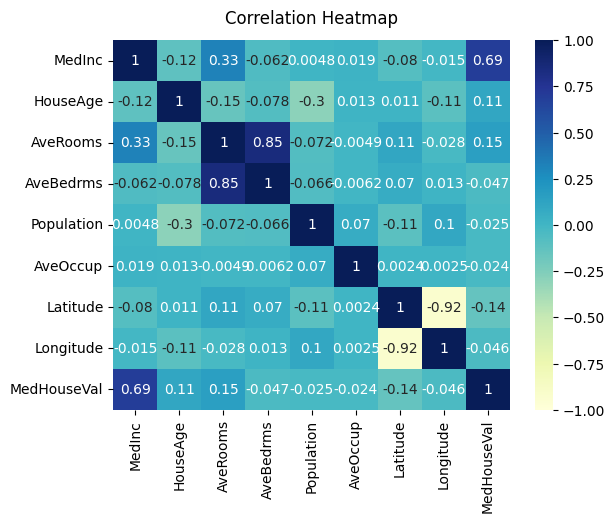

In [26]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap = 'YlGnBu')
heatmap.set_title('Correlation Heatmap', pad=12)

Now that we've read the data we need to preprocess it by implementing:

    1) Outlier Removal
    2) Standard Scaling Normalization

Since we only have Quant Data we don't need to One Hot Encode any variables

**Outlier Removal**

We can check for outliers with the help of Box plots, IQR and Distributions

**Normalization**

In [27]:
def normalize(data):
    for column in data.columns:
        data[column] = (data[column] - data[column].mean()) / data[column].std()

In [28]:
normalize(df)
display(df.head())
m, n = df.shape

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344709,0.982119,0.628544,-0.153754,-0.974405,-0.049595,1.052523,-1.327803,2.129580
1,2.332181,-0.607004,0.327033,-0.263329,0.861418,-0.092510,1.043159,-1.322812,1.314124
2,1.782656,1.856137,1.155592,-0.049015,-0.820757,-0.025842,1.038478,-1.332794,1.258663
3,0.932945,1.856137,0.156962,-0.049832,-0.766010,-0.050328,1.038478,-1.337785,1.165072
4,-0.012881,1.856137,0.344702,-0.032905,-0.759828,-0.085614,1.038478,-1.337785,1.172871


In [29]:
y = np.array(df['MedHouseVal'], dtype = 'float').reshape(m,1)
df.drop(['MedHouseVal'], axis = 1, inplace = True)
X = np.array(df, dtype = 'float')

In [30]:
print(X.shape, y.shape)

(20640, 8) (20640, 1)


In [31]:
b = np.ones((m,1), dtype = float)
X = np.column_stack((b, X))
X.shape

(20640, 9)

Final Cost: [0.36683342]


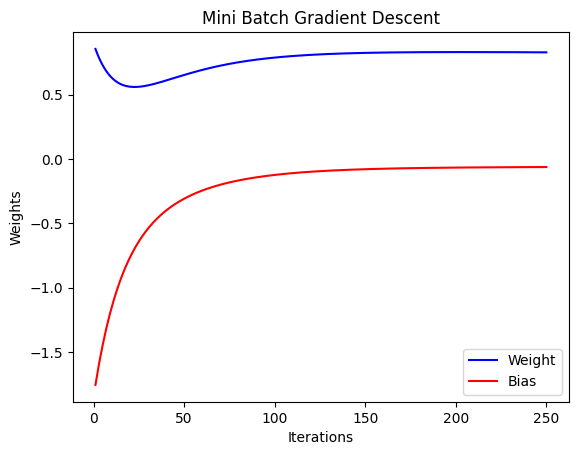

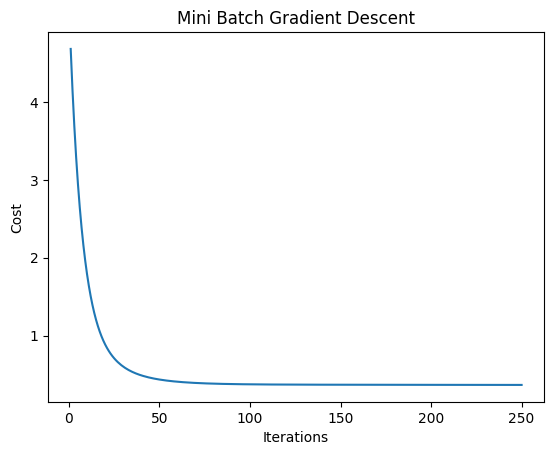

Final Weights:  [[-0.06206907]
 [ 0.82916204]
 [ 0.0813354 ]
 [-0.69623596]
 [ 0.17123147]
 [ 0.04651149]
 [-0.21117473]
 [ 0.18125074]
 [ 0.27640085]]


In [32]:
theta = np.random.randn(n, 1)
theta = mb_gradient_descent(X, y, theta, 0.05, 250, 32)

[0.47642702]


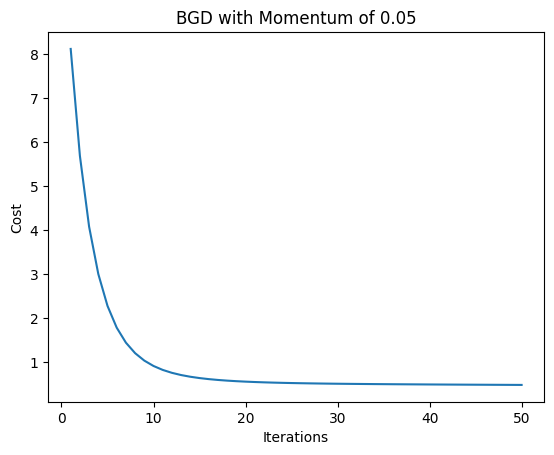

In [35]:
theta = np.random.randn(n,1)
theta = batch_gradient_descent_momentum(X, y, theta, lr = 0.1, epochs = 50, momentum = 0.05)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder()

le.fit()